In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data.csv')
dataset.head() 

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3,1.50,1340,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5,2.50,3650,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3,2.00,1930,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3,2.25,2000,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4,2.50,1940,1.0,0,0,4,1140,800,1976,1992,Redmond


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   int64  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   floors         4600 non-null   float64
 5   waterfront     4600 non-null   int64  
 6   view           4600 non-null   int64  
 7   condition      4600 non-null   int64  
 8   sqft_above     4600 non-null   int64  
 9   sqft_basement  4600 non-null   int64  
 10  yr_built       4600 non-null   int64  
 11  yr_renovated   4600 non-null   int64  
 12  city           4600 non-null   object 
dtypes: float64(3), int64(9), object(1)
memory usage: 467.3+ KB


In [4]:
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
dataset.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'city'],
      dtype='object')

In [6]:
dic = {'Shoreline':1, 'Seattle':2, 'Kent':3, 'Bellevue':4, 'Redmond':5,
       'Maple Valley':6, 'North Bend':7, 'Lake Forest Park':8, 'Sammamish':9,
       'Auburn':10, 'Des Moines':11, 'Bothell':12, 'Federal Way':13, 'Kirkland':14,
       'Issaquah':15, 'Woodinville':16, 'Normandy Park':17, 'Fall City':18, 'Renton':19,
       'Carnation':20, 'Snoqualmie':21, 'Duvall':22, 'Burien':23, 'Covington':24,
       'Inglewood-Finn Hill':25, 'Kenmore':26, 'Newcastle':27, 'Mercer Island':28,
       'Black Diamond':29, 'Ravensdale':30, 'Clyde Hill':31, 'Algona':32, 'Skykomish':33,
       'Tukwila':34, 'Vashon':35, 'Yarrow Point':36, 'SeaTac':37, 'Medina':38,
       'Enumclaw':39, 'Snoqualmie Pass':40, 'Pacific':41, 'Beaux Arts Village':42,
       'Preston':43, 'Milton':44}

In [7]:
dataset.city = [dic[item] for item in dataset.city]
dataset

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.130000e+05,3,1.50,1340,1.5,0,0,3,1340,0,1955,2005,1
1,2.384000e+06,5,2.50,3650,2.0,0,4,5,3370,280,1921,0,2
2,3.420000e+05,3,2.00,1930,1.0,0,0,4,1930,0,1966,0,3
3,4.200000e+05,3,2.25,2000,1.0,0,0,4,1000,1000,1963,0,4
4,5.500000e+05,4,2.50,1940,1.0,0,0,4,1140,800,1976,1992,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,1510,1.0,0,0,4,1510,0,1954,1979,2
4596,5.343333e+05,3,2.50,1460,2.0,0,0,3,1460,0,1983,2009,4
4597,4.169042e+05,3,2.50,3010,2.0,0,0,3,3010,0,2009,0,19
4598,2.034000e+05,4,2.00,2090,1.0,0,0,3,1070,1020,1974,0,2


In [8]:
X = dataset.iloc[:,1:13]
X

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3,1.50,1340,1.5,0,0,3,1340,0,1955,2005,1
1,5,2.50,3650,2.0,0,4,5,3370,280,1921,0,2
2,3,2.00,1930,1.0,0,0,4,1930,0,1966,0,3
3,3,2.25,2000,1.0,0,0,4,1000,1000,1963,0,4
4,4,2.50,1940,1.0,0,0,4,1140,800,1976,1992,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3,1.75,1510,1.0,0,0,4,1510,0,1954,1979,2
4596,3,2.50,1460,2.0,0,0,3,1460,0,1983,2009,4
4597,3,2.50,3010,2.0,0,0,3,3010,0,2009,0,19
4598,4,2.00,2090,1.0,0,0,3,1070,1020,1974,0,2


In [9]:
Y = dataset.iloc[:,0]
Y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 46) 

In [11]:
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression() 

regressor.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print(regressor.intercept_)

3910468.2911142064


In [13]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient']) 
coeff_df

,Coefficient
bedrooms,-5.137169e+04
bathrooms,4.886361e+04
sqft_living,-1.949116e+15
floors,2.310491e+04
waterfront,4.407690e+05
view,4.121685e+04
condition,3.649362e+04
sqft_above,1.949116e+15
sqft_basement,1.949116e+15
yr_built,-2.015103e+03


In [14]:
y_pred = regressor.predict(X_test)  

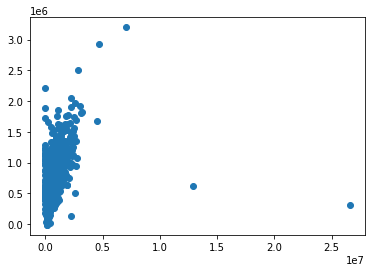

In [15]:
plt.scatter(y_train, regressor.predict(X_train))

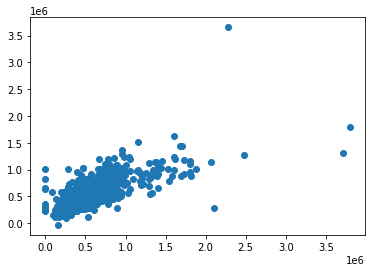

In [16]:
plt.scatter(y_test,y_pred)

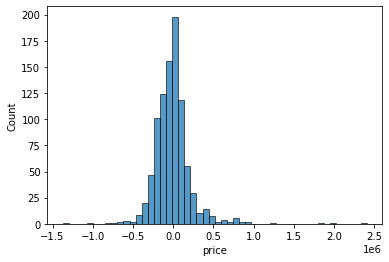

In [17]:
sns.histplot((y_test-y_pred),bins=50); 

In [18]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 153807.6125407998
MSE: 59585434967.24513
RMSE: 244101.28014257757


In [19]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(10)

,Actual,Predicted
1252,200000.0,1.913804e+05
2315,700000.0,7.793323e+05
3500,451000.0,6.584995e+05
2047,589500.0,5.314592e+05
3356,594000.0,2.833963e+05
846,379950.0,5.439308e+05
2379,585000.0,4.846763e+05
2040,1370000.0,9.847723e+05
509,201000.0,3.827102e+05
2358,784000.0,1.023300e+06


In [20]:
df.reset_index(drop=True, inplace=True)
df.head(10)

,Actual,Predicted
0,200000.0,1.913804e+05
1,700000.0,7.793323e+05
2,451000.0,6.584995e+05
3,589500.0,5.314592e+05
4,594000.0,2.833963e+05
5,379950.0,5.439308e+05
6,585000.0,4.846763e+05
7,1370000.0,9.847723e+05
8,201000.0,3.827102e+05
9,784000.0,1.023300e+06


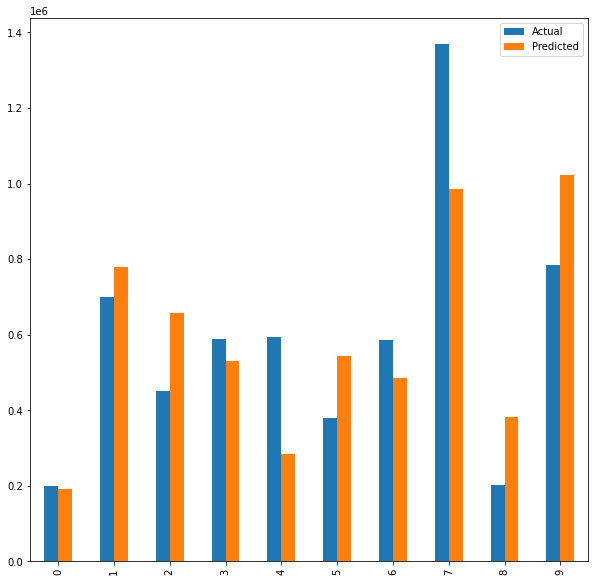

In [21]:
df.head(10).plot(kind='bar',figsize=(10,10))
plt.show()